In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\veera\Downloads\PRANAV B\docs\projects\Transactional Fraud Detection Analysis\data\clean_creditcard.csv")

In [3]:
print("Data shape:", df.shape)
df.head()

Data shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df['Class'].value_counts())
#Class — 1 = Fraud, 0 = Legit

Class
0    284315
1       492
Name: count, dtype: int64


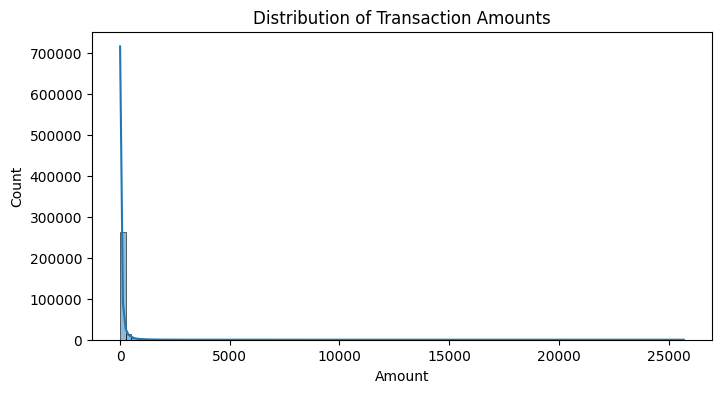

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.show()
#Observation:
#Most transactions are small (skewed toward 0), but a few high-value ones exist.

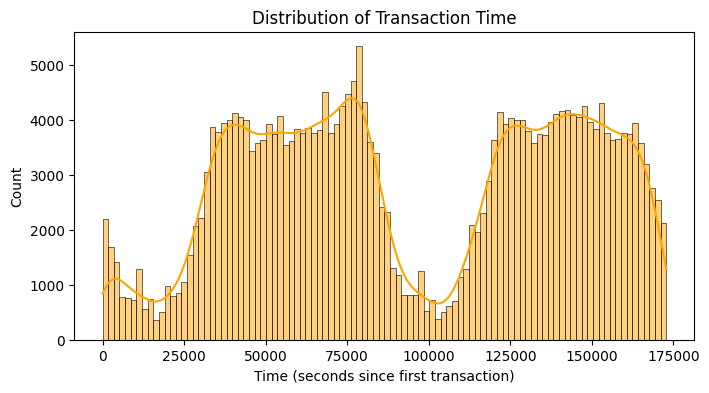

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['Time'], bins=100, kde=True, color="orange")
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (seconds since first transaction)")
plt.show()
#Observation:
#The dataset’s Time column indicates seconds elapsed since the first transaction—useful for time-based patterns.

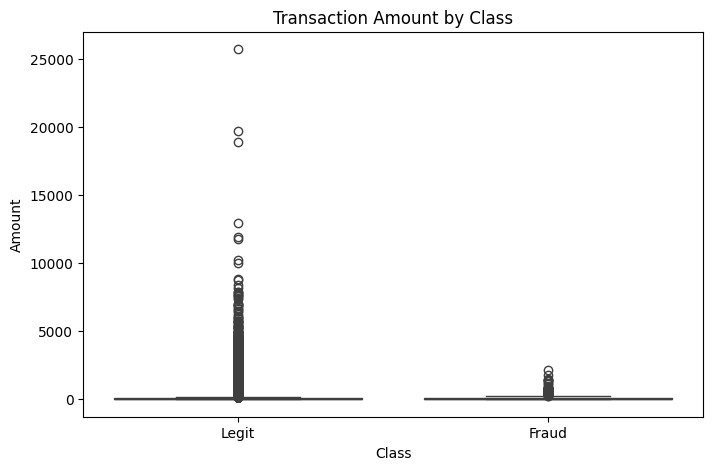

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount by Class")
plt.xticks([0,1], ['Legit', 'Fraud'])
plt.show()
#Observation:
#Fraudulent transactions often have distinct (sometimes smaller, sometimes larger) value patterns compared to legitimate ones.

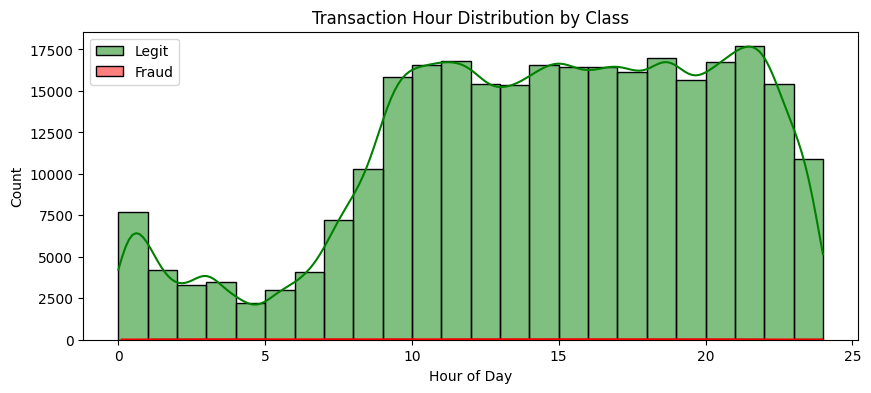

In [8]:
df['Hour'] = (df['Time'] / 3600) % 24

plt.figure(figsize=(10,4))
sns.histplot(df[df['Class']==0]['Hour'], bins=24, color='green', label='Legit', kde=True)
sns.histplot(df[df['Class']==1]['Hour'], bins=24, color='red', label='Fraud', kde=True)
plt.title("Transaction Hour Distribution by Class")
plt.xlabel("Hour of Day")
plt.legend()
plt.show()
#Observation:
#If frauds cluster at specific times (e.g., late night hours), it’s a potential predictive feature.

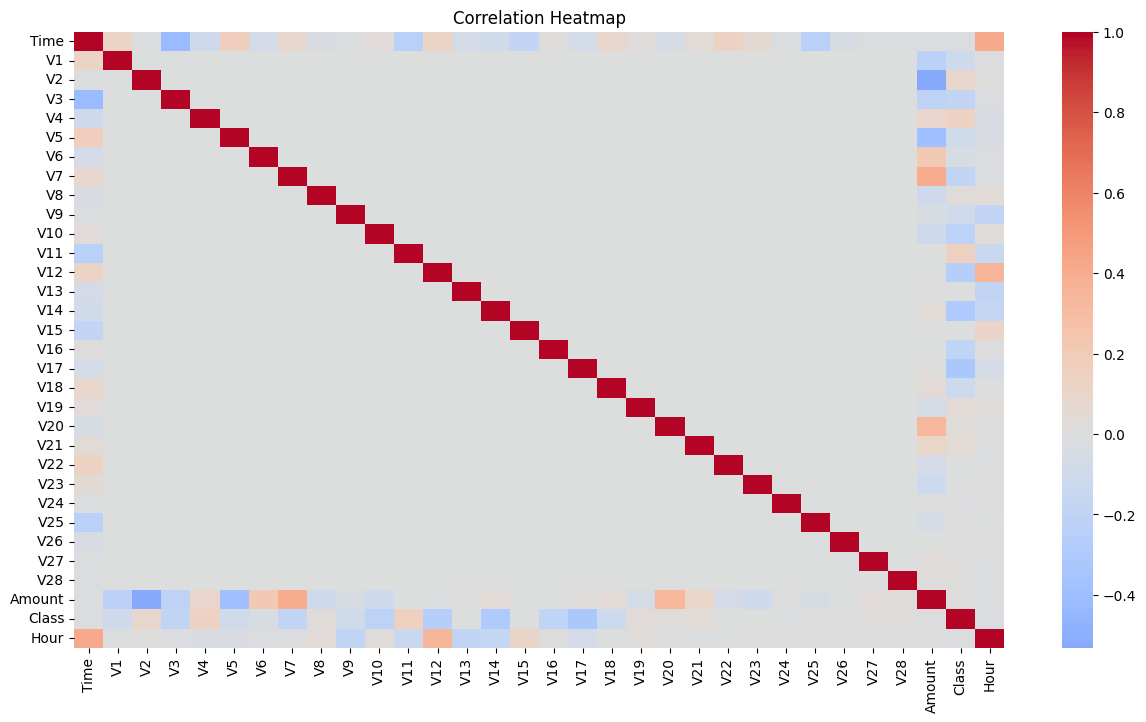

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

In [9]:
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Which features correlate most with fraud?
corr['Class'].sort_values(ascending=False).head(10)
#Insights
#You’ll see certain components (e.g., V17, V14, V12, V10) strongly correlated with Class.

C:\Users\veera\AppData\Local\Temp\ipykernel_5020\3135931860.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(legit[col], label='Legit', shade=True)
C:\Users\veera\AppData\Local\Temp\ipykernel_5020\3135931860.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col], label='Fraud', shade=True)
C:\Users\veera\AppData\Local\Temp\ipykernel_5020\3135931860.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(legit[col], label='Legit', shade=True)
C:\Users\veera\AppData\Local\Temp\ipykernel_5020\3135931860.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error

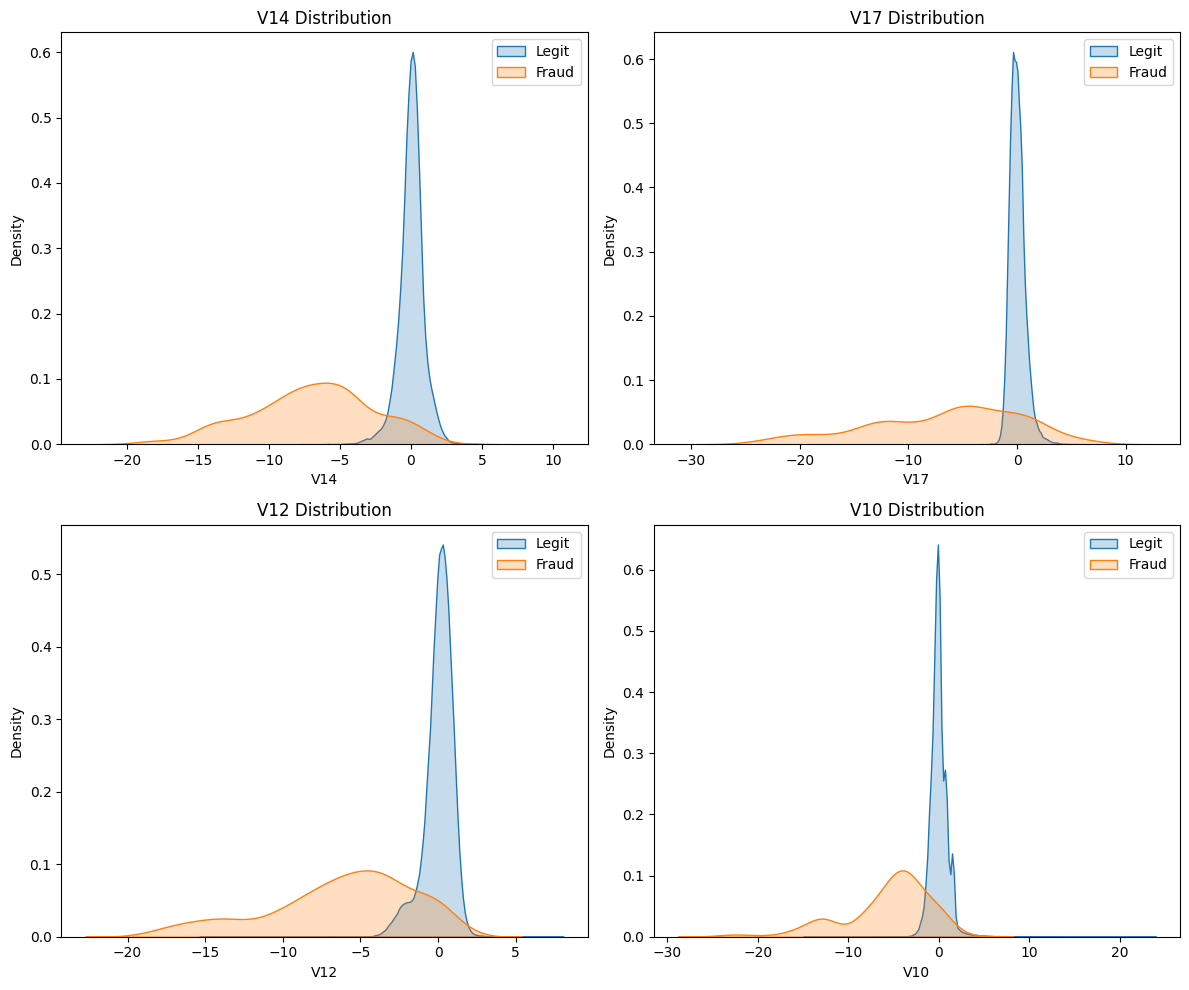

In [10]:
fraud = df[df['Class']==1]
legit = df[df['Class']==0]

plt.figure(figsize=(12,10))
for i, col in enumerate(['V14','V17','V12','V10']):
    plt.subplot(2,2,i+1)
    sns.kdeplot(legit[col], label='Legit', shade=True)
    sns.kdeplot(fraud[col], label='Fraud', shade=True)
    plt.title(f'{col} Distribution')
    plt.legend()
plt.tight_layout()
plt.show()
#Insights
#You’ll visually see how distributions differ for these PCA components — great story slides for your presentation.

In [11]:
df.to_csv(r"C:\Users\veera\Downloads\PRANAV B\docs\projects\Transactional Fraud Detection Analysis\data\eda_ready_data.csv", index=False)


In [12]:
!jupyter nbconvert --to html "week2_EDA.ipynb" --output-dir="reports"


[NbConvertApp] Converting notebook week2_EDA.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 594615 bytes to reports\week2_EDA.html
